In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/user_behavior_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [ ]:
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


<Axes: xlabel='User Behavior Class', ylabel='count'>

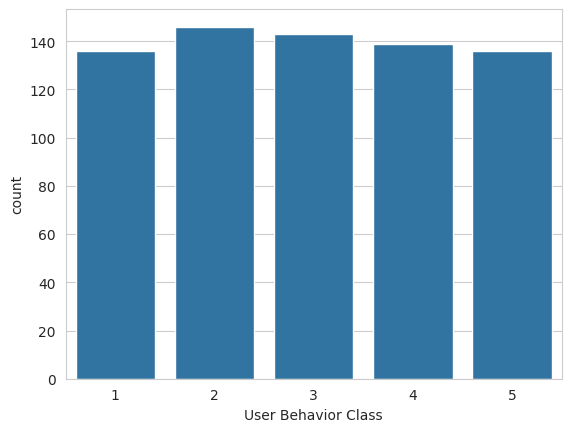

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='User Behavior Class', data=data)

<Axes: xlabel='User Behavior Class', ylabel='count'>

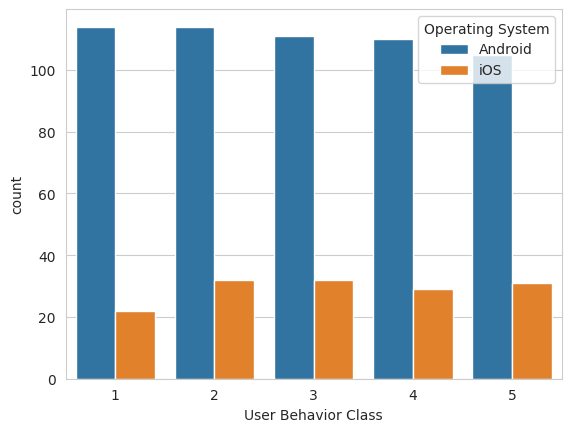

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='User Behavior Class', data=data,hue='Operating System')

In [ ]:
Operating_System = pd.get_dummies(data['Operating System'],drop_first=True).astype(int)

     iOS
0      0
1      0
2      0
3      0
4      1
..   ...
695    1
696    0
697    0
698    0
699    0

[700 rows x 1 columns]


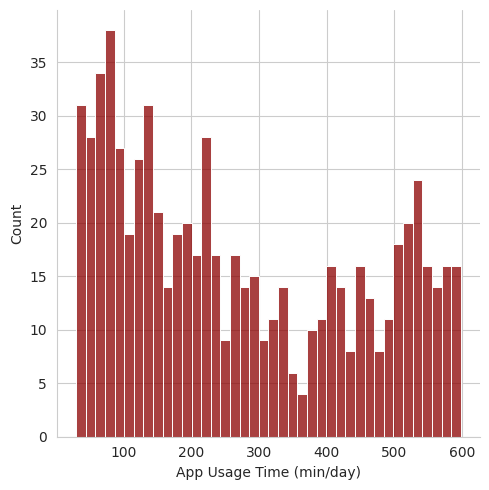

In [ ]:
sns.displot(data['App Usage Time (min/day)'].dropna(),kde = False, color='darkred',bins=40)

<Axes: xlabel='User Behavior Class', ylabel='count'>

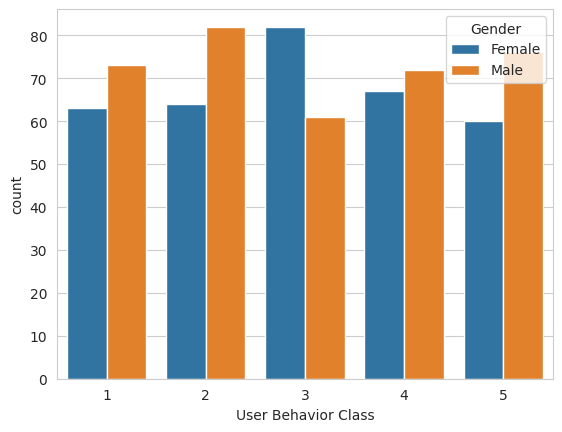

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='User Behavior Class', data=data,hue='Gender')

In [ ]:
Gender = pd.get_dummies(data['Gender'],drop_first=True).astype(int)

<Axes: xlabel='Device Model', ylabel='count'>

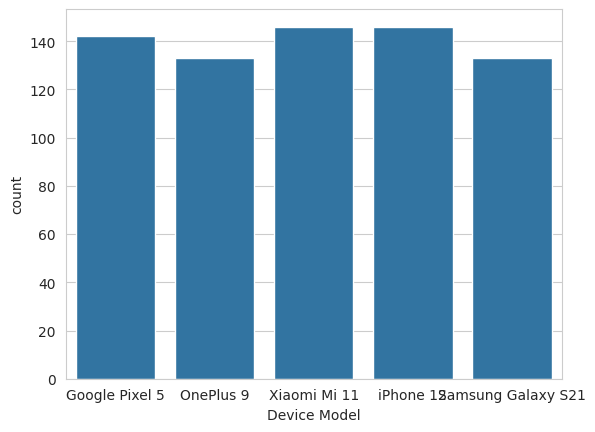

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Device Model',data=data)

In [ ]:
data.drop(['Device Model','Operating System','Gender'],axis = 1,inplace=True)
data.head()

KeyError: "['Device Model', 'Operating System', 'Gender'] not found in axis"

In [ ]:
data.head()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
0,1,393,6.4,1872,67,1122,40,4
1,2,268,4.7,1331,42,944,47,3
2,3,154,4.0,761,32,322,42,2
3,4,239,4.8,1676,56,871,20,3
4,5,187,4.3,1367,58,988,31,3


In [ ]:
data = pd.concat([data,Operating_System,Gender],axis =1)

In [ ]:
data.head()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,iOS,Male
0,1,393,6.4,1872,67,1122,40,4,0,1
1,2,268,4.7,1331,42,944,47,3,0,0
2,3,154,4.0,761,32,322,42,2,0,1
3,4,239,4.8,1676,56,871,20,3,0,1
4,5,187,4.3,1367,58,988,31,3,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   App Usage Time (min/day)    700 non-null    int64  
 2   Screen On Time (hours/day)  700 non-null    float64
 3   Battery Drain (mAh/day)     700 non-null    int64  
 4   Number of Apps Installed    700 non-null    int64  
 5   Data Usage (MB/day)         700 non-null    int64  
 6   Age                         700 non-null    int64  
 7   User Behavior Class         700 non-null    int64  
 8   iOS                         700 non-null    int64  
 9   Male                        700 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.8 KB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data.drop('User Behavior Class',axis = 1,),
                                                 data['User Behavior Class'],test_size=0.30,random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
prediction = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test,prediction)

In [ ]:
accuracy

0.580952380952381

**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

1.0

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

1.0